<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-07-30 06:32:50--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  51.0MB/s    in 3.9s    

2025-07-30 06:32:54 (51.7 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib

In [45]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

#### Connect to the SQLite database


In [46]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [21]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


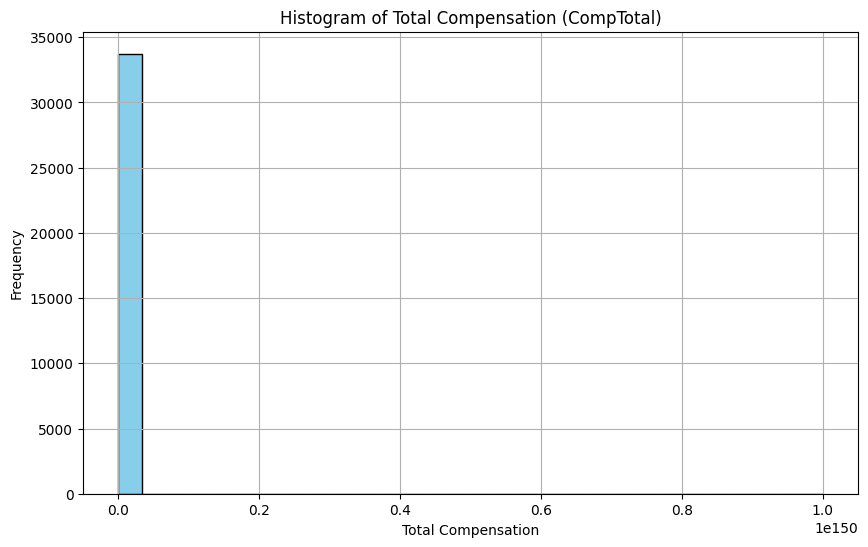

In [22]:
# Query to select CompTotal values where not null
query = "SELECT CompTotal FROM main WHERE CompTotal IS NOT NULL;"

# Load data into pandas DataFrame
df = pd.read_sql_query(query, conn)

# Plot histogram
plt.figure(figsize=(10,6))
plt.hist(df['CompTotal'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Total Compensation (CompTotal)')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


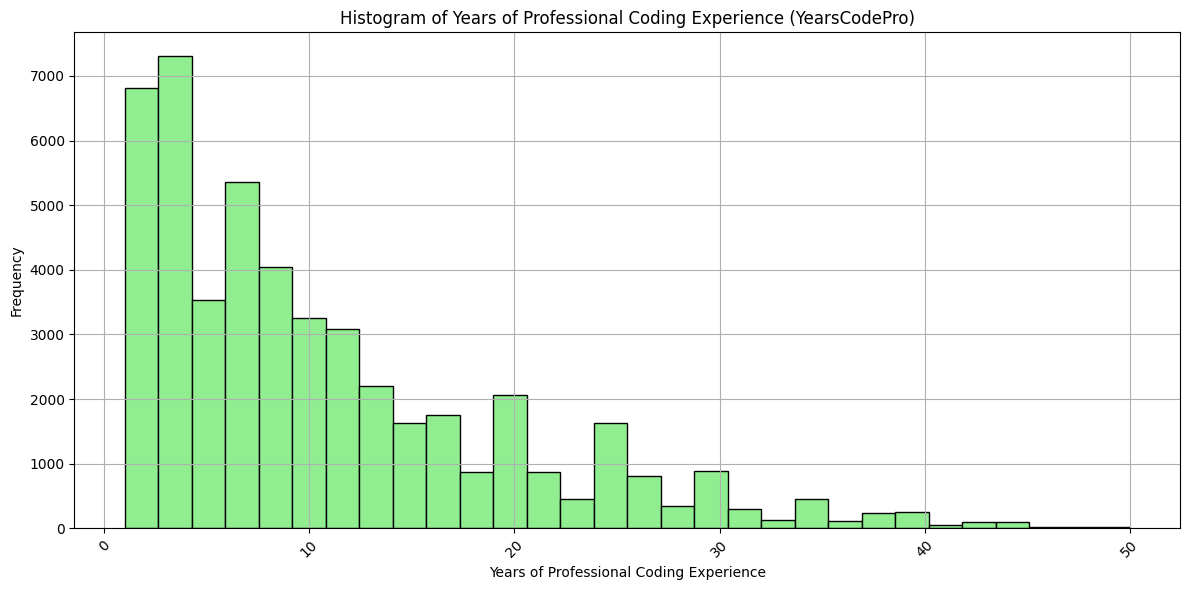

In [25]:
# Query the YearsCodePro column
query = "SELECT YearsCodePro FROM main WHERE YearsCodePro IS NOT NULL;"
df = pd.read_sql_query(query, conn)

# Convert YearsCodePro to numeric if not already
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows where conversion failed (NaN)
df = df.dropna(subset=['YearsCodePro'])

plt.figure(figsize=(12,6))
plt.hist(df['YearsCodePro'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Years of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


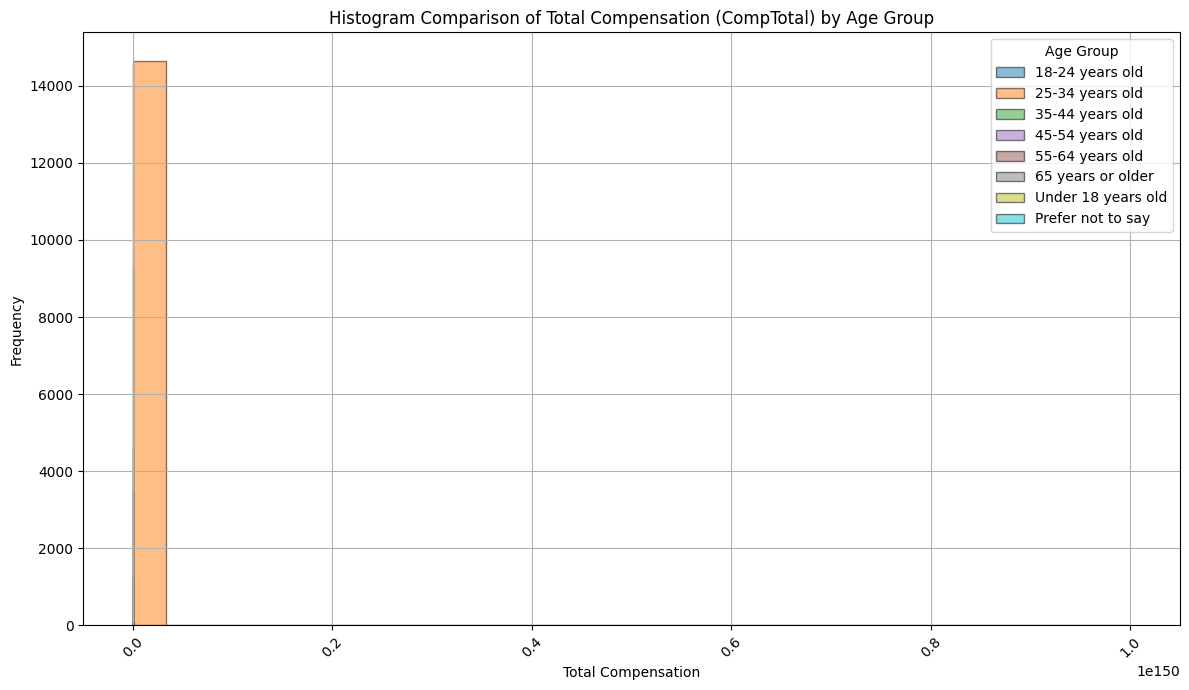

In [29]:
import matplotlib
import matplotlib.pyplot as plt
query = """
SELECT CompTotal, Age FROM main
WHERE CompTotal IS NOT NULL AND Age IS NOT NULL;
"""
df = pd.read_sql_query(query, conn)

df['Age'] = df['Age'].str.strip()

age_groups = df['Age'].unique()

colors = matplotlib.colormaps['tab10'].resampled(len(age_groups))

plt.figure(figsize=(12, 7))

for i, age in enumerate(age_groups):
    subset = df[df['Age'] == age]['CompTotal']
    plt.hist(subset, bins=30, alpha=0.5, color=colors(i), label=age, edgecolor='black')

plt.title('Histogram Comparison of Total Compensation (CompTotal) by Age Group')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.legend(title='Age Group')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


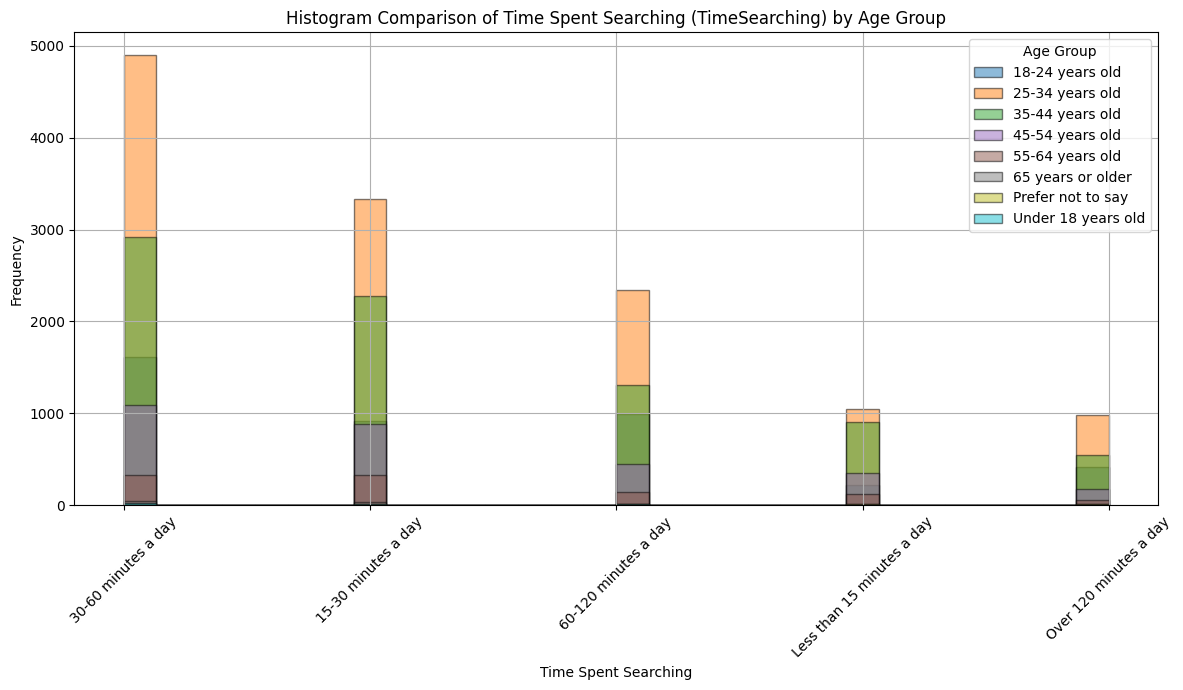

In [30]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query to fetch TimeSearching and Age where neither is null
query = """
SELECT TimeSearching, Age
FROM main
WHERE TimeSearching IS NOT NULL AND Age IS NOT NULL;
"""

# Load data into pandas DataFrame
df = pd.read_sql_query(query, conn)

# Clean Age groups by stripping whitespace if any
df['Age'] = df['Age'].str.strip()

# Get sorted unique age groups to keep order consistent
age_groups = sorted(df['Age'].unique())

# Get a colormap with as many colors as age groups (non-deprecated way)
colors = matplotlib.colormaps['tab10'].resampled(len(age_groups))

plt.figure(figsize=(12, 7))

# Plot histogram for each age group
for i, age in enumerate(age_groups):
    subset = df[df['Age'] == age]['TimeSearching']
    plt.hist(subset, bins=30, alpha=0.5, color=colors(i), label=age, edgecolor='black')

plt.title('Histogram Comparison of Time Spent Searching (TimeSearching) by Age Group')
plt.xlabel('Time Spent Searching')
plt.ylabel('Frequency')
plt.legend(title='Age Group')
plt.grid(True)

# Rotate x-axis labels if overlap occurs (optional)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


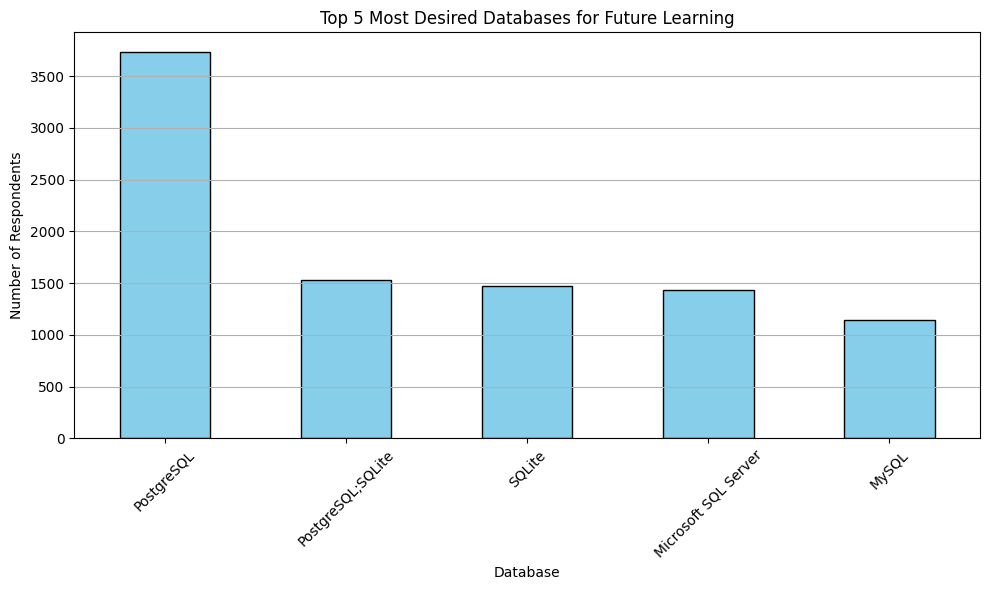

In [31]:
# Query non-null DatabaseWantToWorkWith column
query = "SELECT DatabaseWantToWorkWith FROM main WHERE DatabaseWantToWorkWith IS NOT NULL;"

df = pd.read_sql_query(query, conn)

# Sometimes entries may contain multiple databases separated by delimiters (commas, semicolons)
# If so, split these to count each database separately.
# Adjust the delimiter if needed; here assuming comma separation

# Explode multiple database entries into separate rows
df_expanded = df['DatabaseWantToWorkWith'].str.split(',', expand=True).stack().str.strip().reset_index(drop=True)

# Count frequency of each database
db_counts = df_expanded.value_counts()

# Take top 5 most desired databases
top5_db = db_counts.head(5)

# Plot bar plot
plt.figure(figsize=(10,6))
top5_db.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Top 5 Most Desired Databases for Future Learning')
plt.xlabel('Database')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


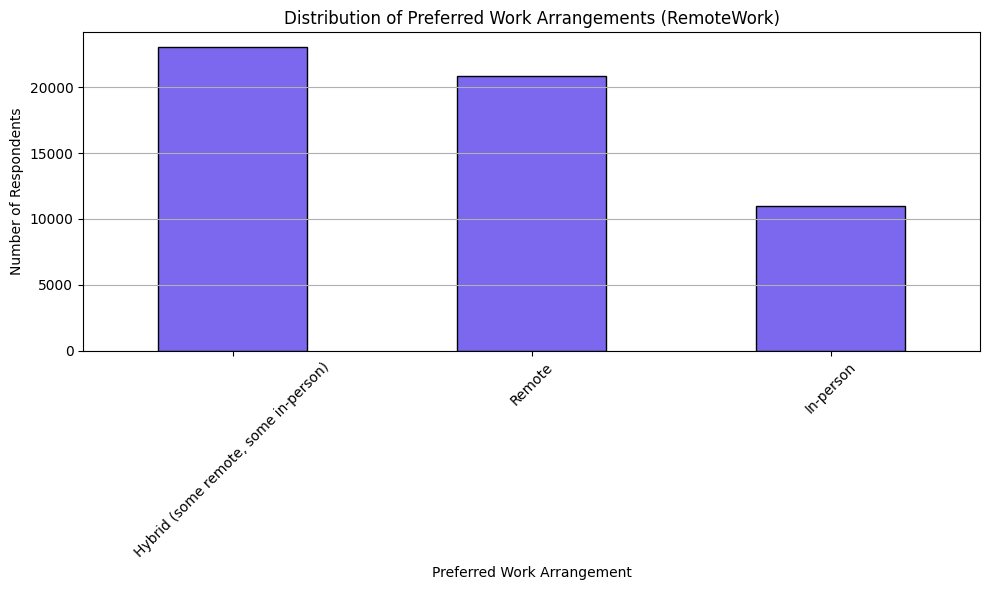

In [32]:
# Query RemoteWork column where not null
query = "SELECT RemoteWork FROM main WHERE RemoteWork IS NOT NULL;"

# Load data into DataFrame
df = pd.read_sql_query(query, conn)

# Count frequency of each category
remote_counts = df['RemoteWork'].value_counts()

# Plot as bar chart
plt.figure(figsize=(10,6))
remote_counts.plot(kind='bar', color='mediumslateblue', edgecolor='black')

plt.title('Distribution of Preferred Work Arrangements (RemoteWork)')
plt.xlabel('Preferred Work Arrangement')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)  # rotate x labels for readability
plt.grid(axis='y')  # horizontal grid lines

plt.tight_layout()
plt.show()


### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


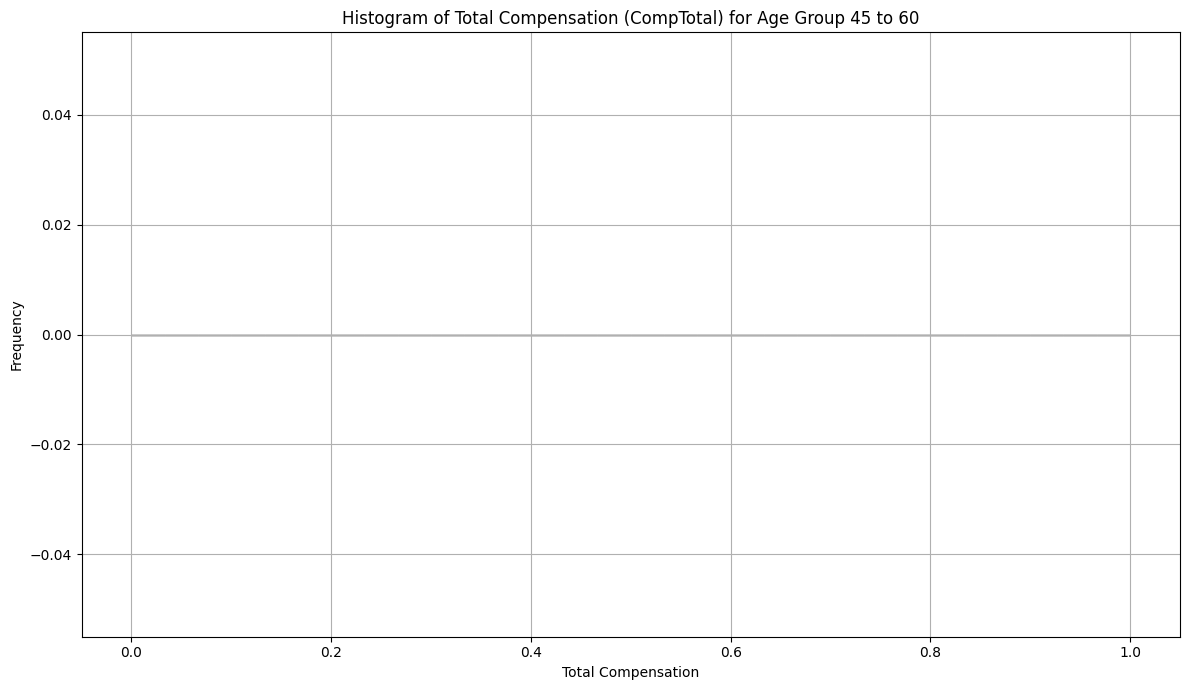

(0, 1)
Empty DataFrame
Columns: [CompTotal]
Index: []
count       0
unique      0
top       NaN
freq      NaN
Name: CompTotal, dtype: object


In [34]:
# Connect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Define age groups representing the 45-60 age range
age_groups_45_60 = ['45-54', '55-64']

# SQL query: filter by Age groups and non-null CompTotal
query = f"""
SELECT CompTotal
FROM main
WHERE Age IN ({','.join(['?']*len(age_groups_45_60))})
AND CompTotal IS NOT NULL;
"""

# Execute query with parameters for age groups
df = pd.read_sql_query(query, conn, params=age_groups_45_60)

# Plot histogram of CompTotal for age 45 to 60
plt.figure(figsize=(12, 7))
plt.hist(df['CompTotal'], bins=30, color='steelblue', edgecolor='black')

plt.title('Histogram of Total Compensation (CompTotal) for Age Group 45 to 60')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

print(df.shape)      # Number of rows and columns
print(df.head())     # First few rows to inspect data
print(df['CompTotal'].describe())  # Statistical summary of the compensation data



**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


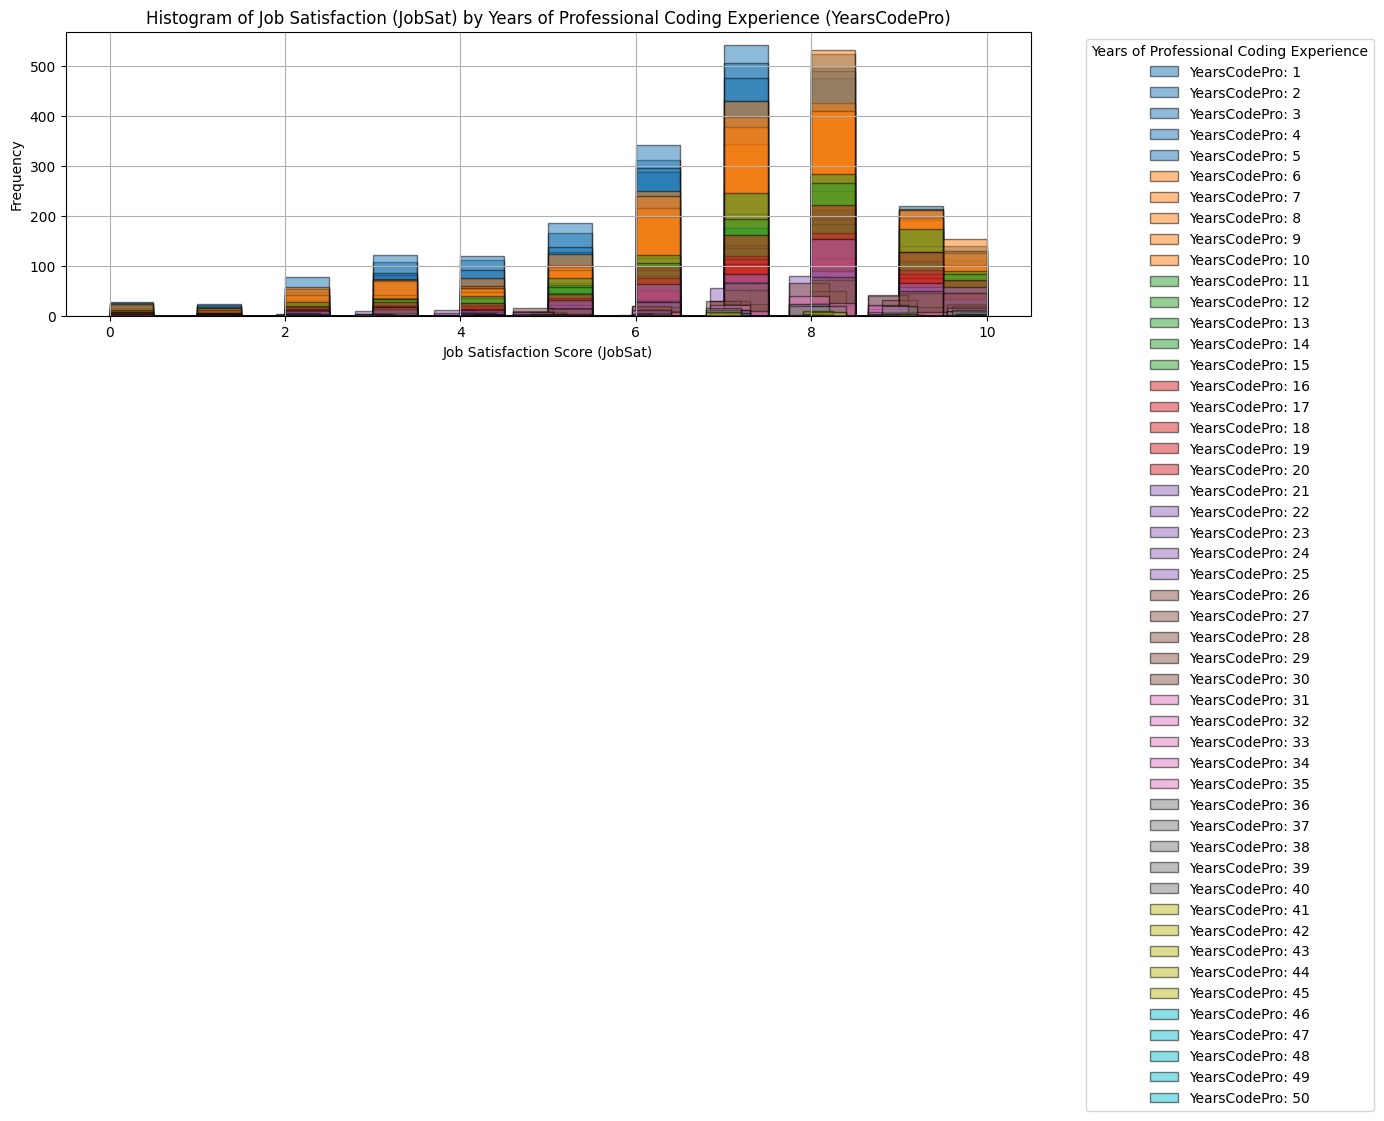

In [53]:
import sqlite3
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Query JobSat and YearsCodePro where both are not null
query = """
SELECT JobSat, YearsCodePro
FROM main
WHERE JobSat IS NOT NULL AND YearsCodePro IS NOT NULL;
"""

df = pd.read_sql_query(query, conn)
conn.close()

# Convert YearsCodePro and JobSat to numeric (if not already)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce')
df = df.dropna(subset=['YearsCodePro', 'JobSat'])

# Optional: Group YearsCodePro into bins (e.g., by rounding or intervals)
# For example, rounding years to nearest integer or categorizing into bins of 5 years
df['YearsCodeProRounded'] = df['YearsCodePro'].round().astype(int)

# Get unique rounded years of experience
years_groups = sorted(df['YearsCodeProRounded'].unique())

# Use matplotlib colormap for distinct colors per group
colors = matplotlib.colormaps['tab10'].resampled(len(years_groups))

plt.figure(figsize=(14, 8))

# Plot a histogram of JobSat for each YearsCodePro rounded group
for i, year in enumerate(years_groups):
    subset = df[df['YearsCodeProRounded'] == year]['JobSat']
    plt.hist(subset, bins=20, alpha=0.5, color=colors(i), label=f'YearsCodePro: {year}', edgecolor='black')

plt.title('Histogram of Job Satisfaction (JobSat) by Years of Professional Coding Experience (YearsCodePro)')
plt.xlabel('Job Satisfaction Score (JobSat)')
plt.ylabel('Frequency')
plt.legend(title='Years of Professional Coding Experience', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [54]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
